**Name: Mubanga Nsofu** <br>
**Course: BAN6420, Module 5**<br>
**Email: mnsofu@learner.nexford.org** <br>
**Leaner Id: 149050** <br>
**Institution: Nexford University**<br>
**Lecturer: Prof. R. Wanjiku** <br>
**Date: 3rd August 2024**
**Task: Application of Principal Component Analysis on Breast Cancer Data**


**1.0 This notebook shows an implementation of Principal Component Analysis on Breast cancer using scikit-learn library**

**2.0 What is Principal Component Analysis a.k.a PCA?** <br>
<br>
*PCA is a method from the realm of unsupervised learning that is widely used for dimensionality reduction,lossy data compression,*<br> 
*data visualization, and feature extraction (Jolliffe, 2002).PCA is also known as the Karhunen-Loeve transform (Bishop,2006).* <br>
*Despite there being different definitions of PCA, these all converge to the same algorithm.*<br>
<br>

*Mathematically, we can employ the eigenvalues and eigenvectors to compute the PCA* <br>
<br>
*-An **Eigenvector** is a non scalar quantity (thus is a non-zero vector) that does not change direction when any linear transformationi is applied. It only chnages by a sclar factor in magnitude*
<br>
*-An **Eigenvalue** is a scalar quantity associated with a system of linear euqations. Eigen means proper or characteristic in German.*
<br>

*Mathematically, we can write the eigenvalue and eigenvectors as below:*










$$
Ax = \lambda x
$$

$\lambda$ is the eigenvalue and $x$ is the eigenvector <br>
<br>
*The eigenvectors (Principal Components) give the direction of the new space, while eigenvalues determine their magnitude (or importance)*

 

**3.0 Prior to performing PCA we load the key libraries** 

In [20]:
# Import libraries

from sklearn import datasets # has cancer dataset
from sklearn.decomposition import PCA # has an implementation of PCA, refer to API
from sklearn.preprocessing import StandardScaler # Needed to scale/standardize the data
import pandas as pd # manipulation of the dataframe
import matplotlib.pyplot as plt # for data viz
import seaborn as sns # for beautiful plots built on top of matplotlib
import numpy as np # for fast numerical vectorized computations & reproducibility using the random function
import sweetviz as sv # Library for Exploratory Data Analysis (EDA)



**4.0 We load the dataset and explore it**

In [29]:
np.random.seed(2024) # Set seed for reproducibility


# We load the Dataset from sklearn

breast_cancer = datasets.load_breast_cancer() # This line imports the breast cancer dataset from the 'dataset' module in scikit-learn

x = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
y = pd.Series(breast_cancer.target, name='target')

# We combine the features and target into a single DataFrame
breast_cancer_df = pd.concat([x, y], axis=1)

# Let us understand the structure of the DataFrame using the info() method from pandas

print(breast_cancer_df.info())  # Get info about data types and missing values



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

*The exploratory analysis above shows, we have a total of 31 columns and observations. We can also use the sweetviz library for EDA as shown below*

In [ ]:
# Let us analyze the dataframe
report = sv.analyze(breast_cancer_df) # Ensure you have full read and write access to your directory 
# Let us then show the report of the analysis
report.show_html('Breast Cancer.html')

*Based on the report from the sweetviz library, there are no missing values and we can being to reduce the dimensions of the dataset to a two dimensional Eudliean space using PCA* <br>
*We see we have a target variable in the dataset, which is used for breast cancer prediction*

**5.0 We Prepare the dataset for PCA**

In [36]:
X = breast_cancer.data # here we are assigning the feature data to x based on the EDA we have done
y = breast_cancer.target # here we are assigning the target labels or class labels of the Breast Cancer dataset based on the EDA we have done


# We then standardize the dataset, here we are standardizing the numerical varibales in the dataset (30 columns in total). 

scaler = StandardScaler() # we instantiate a scaler from sklearn
X_scaled = scaler.fit_transform(X) # We scale/standardize all the 30 numerical columns.Scaling/standardization is needed beause the different varibales have different scales and magnitudes

**6.0 We Perform PCA using the sklearn API**

In [38]:
pca = PCA(n_components=2) # We instantiate a PCA class from the scikit-learn library, with two dimensions as required
X_pca = pca.fit_transform(X_scaled)# We fit the PCA model to the scaled data  to compute the prinicpal components based on the variance of the data and transforms
# it into a new 2D space with orthogonal vectors. The resukt is stored in the variable X_pca




**7.0 We then visualize the dataset in two dimensions illustrating the power of PCA in terms of dimensionality reduction**

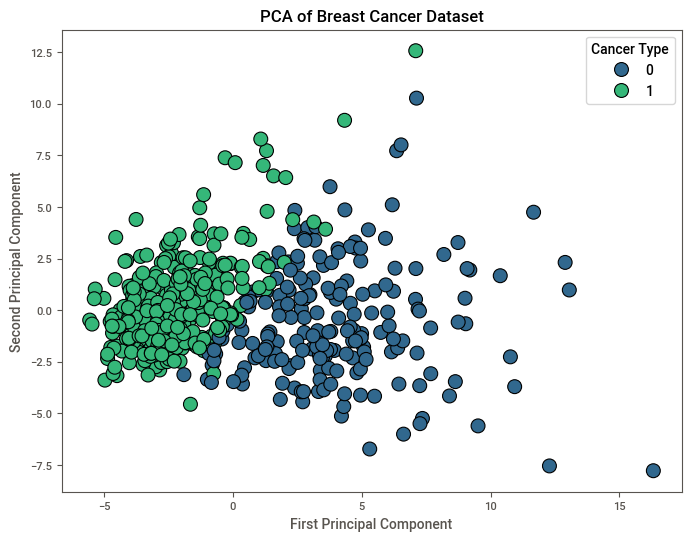

In [48]:
# Let us use seaborn to visualize the 2D PCA

# Create a DataFrame
df = pd.DataFrame(X_pca, columns=['First Principal Component', 'Second Principal Component'])
df['Cancer Type'] = y

# Visualize the results using Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x='First Principal Component', y='Second Principal Component', hue='Cancer Type', palette='viridis', data=df, edgecolor='k', s=100)
plt.title('PCA of Breast Cancer Dataset')
plt.show()

#### **References**

Jolliffe, I. T. (2002). Principal component analysis (2nd ed.). Springer.

Buitinck, L., Louppe, G., Blondel, M., Pedregosa, F., Mueller, A., Grisel, O., Niculae, V., Prettenhofer, P., Gramfort, A., Grobler, J., Layton, R., VanderPlas, J., Joly, A., Holt, B., & Varoquaux, G. (2013). API design for machine learning software: Experiences from the scikit-learn project. In ECML PKDD Workshop: Languages for Data Mining and Machine Learning (pp. 108-122).